In [24]:
import os
import pandas as pd
import mglearn
import numpy as np
adult_path = os.path.join(mglearn.datasets.DATA_PATH,'adult.data')
data = pd.read_csv(
     adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age','workclass','education','gender','hours-per-week',
           'occupation','income']]d
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [28]:
data_dummies = pd.get_dummies(data)

In [40]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X= features.values
y = data_dummies['income_ >50K'].values

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
clf = LogisticRegression().fit(X_train,y_train)
print('Test accuracy {:.3f}'.format(clf.score(X_test,y_test)))

Test accuracy 0.812


In [49]:
demo_df = pd.DataFrame({'Integer Feature' : [0,1,2,1],
                      'Categorical Feature' : ['socks','fox','socks','box']})
pd.get_dummies(demo_df,columns=['Integer Feature','Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


<IPython.core.display.Javascript object>


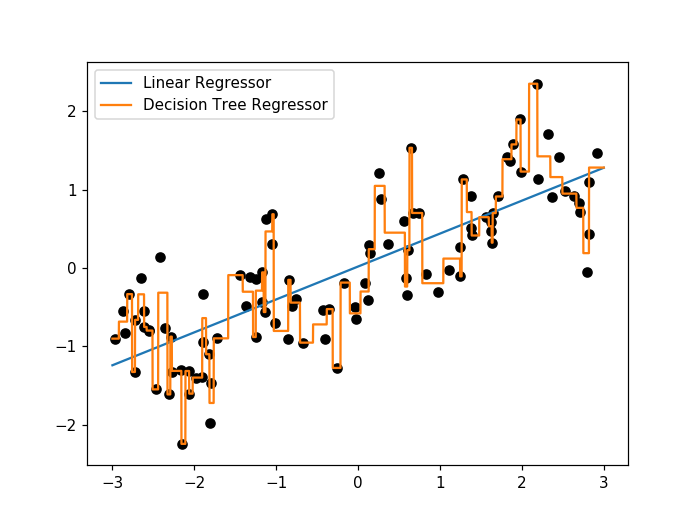

In [74]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=100)

line = np.linspace(-3,3,10000,endpoint=False).reshape(-1,1)
plt.figure()
reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label='Linear Regressor')

reg =DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label = 'Decision Tree Regressor')
plt.scatter(X,y,c='k')
plt.legend();

## Making Linear model powerful

In [87]:
bins = np.linspace(-3,3,11)
which_bin = np.digitize(X,bins=bins)

<IPython.core.display.Javascript object>


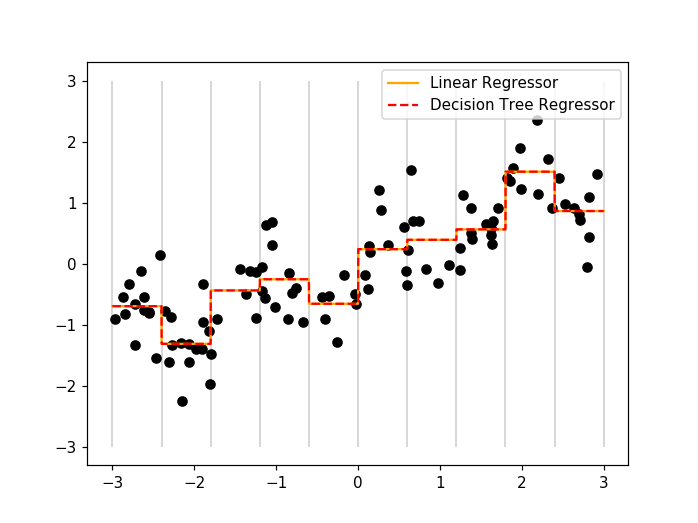

In [131]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
X_binned = encoder.fit_transform(which_bin)
plt.figure()
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg =LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),c='orange',label='Linear Regressor',)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),'r--',label='Decision Tree Regressor')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.scatter(X[:,0],y,c='k')
plt.legend()

In [118]:
?plt.plot